In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels

from scipy import stats
from statsmodels.stats import stattools
from statsmodels.stats.weightstats import DescrStatsW

<b>Datasets : </b> https://www.kaggle.com/kandij/mall-customers

In [2]:
mall_data = pd.read_csv('datasets/mall_data_processed.csv', index_col=0)

mall_data.head(5)

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False


In [5]:
mall_data.shape

(200, 5)

In [6]:
mall_data.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


In [7]:
income_descr = DescrStatsW(mall_data['annual_income'])

age_descr = DescrStatsW(mall_data['age'])

In [8]:
q1_income = income_descr.quantile(0.25)

q3_income = income_descr.quantile(0.75)

In [9]:
q1_income

p
0.25    41000
dtype: int64

In [10]:
q3_income

p
0.75    78000
dtype: int64

In [11]:
type(q1_income)

pandas.core.series.Series

In [12]:
iqr_income = q3_income.loc[0.75] - q1_income.loc[0.25]

iqr_income

np.int64(37000)

In [13]:
stats.iqr(mall_data['annual_income'])

np.float64(36500.0)

In [14]:
stats.iqr(mall_data['annual_income'], interpolation='lower')

np.float64(38000.0)

In [15]:
stats.iqr(mall_data['annual_income'], interpolation='higher')

np.float64(36000.0)

In [16]:
stats.iqr(mall_data['annual_income'], interpolation='midpoint')

np.float64(37000.0)

In [17]:
q1_income_np = np.percentile(mall_data['annual_income'], 25)

q1_income_np

np.float64(41500.0)

In [18]:
q3_income_np = np.percentile(mall_data['annual_income'], 75)

q3_income_np

np.float64(78000.0)

<Axes: ylabel='annual_income'>

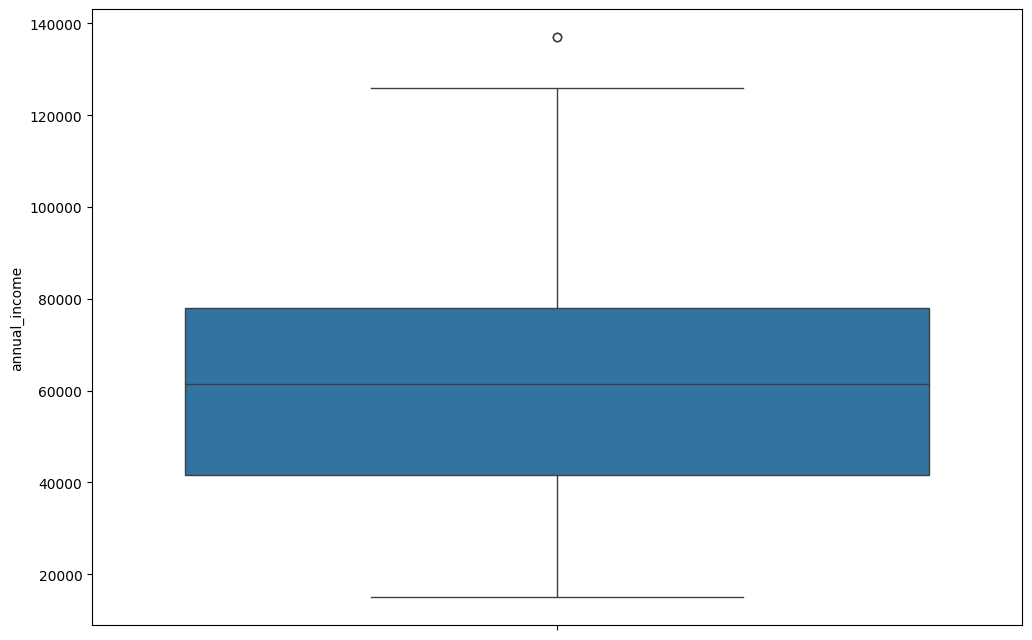

In [19]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_data['annual_income'], orient='v')

<Axes: ylabel='spending_score'>

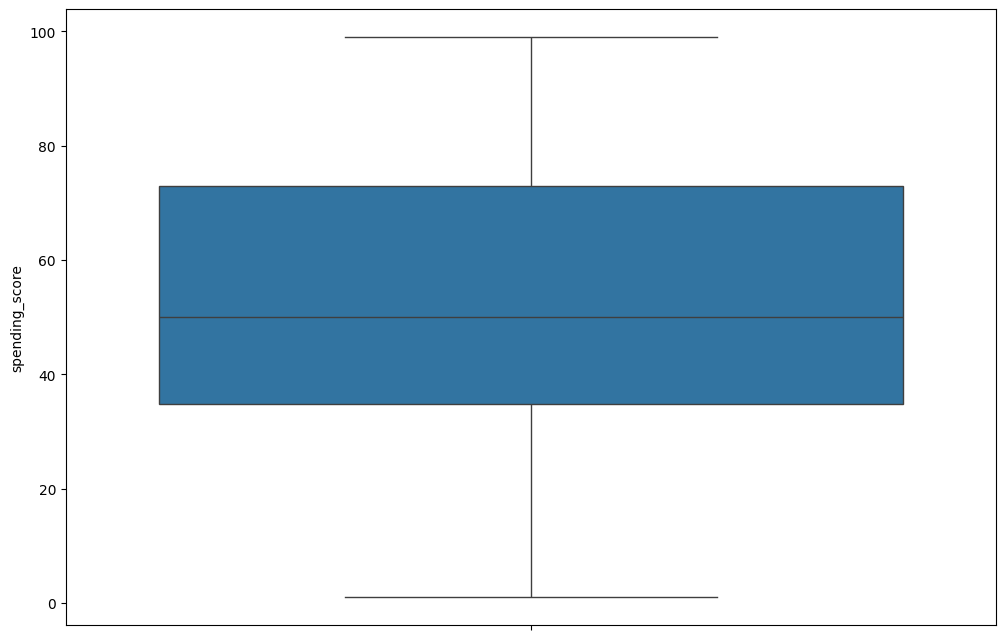

In [20]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_data['spending_score'], orient='v')

In [23]:
mall_data

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False
...,...,...,...,...,...
196,Female,35,120000,79,True
197,Female,45,126000,28,True
198,Male,32,126000,74,True


In [24]:
mall_data.head()

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False


<Axes: xlabel='gender', ylabel='annual_income'>

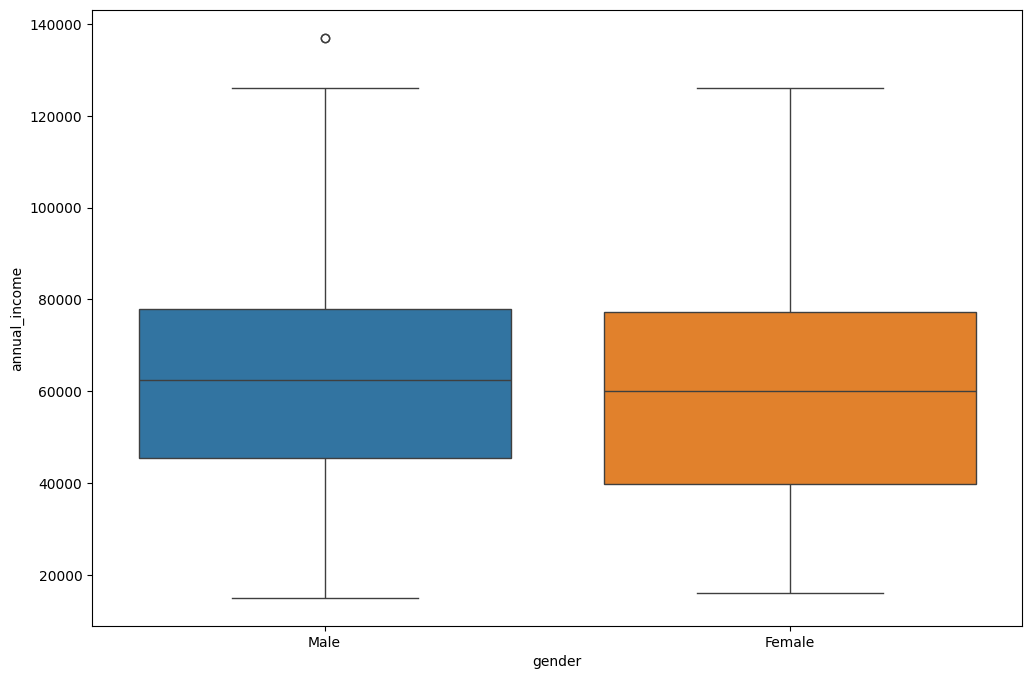

In [25]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='annual_income', hue='gender', data=mall_data, orient='v')

<Axes: xlabel='gender', ylabel='spending_score'>

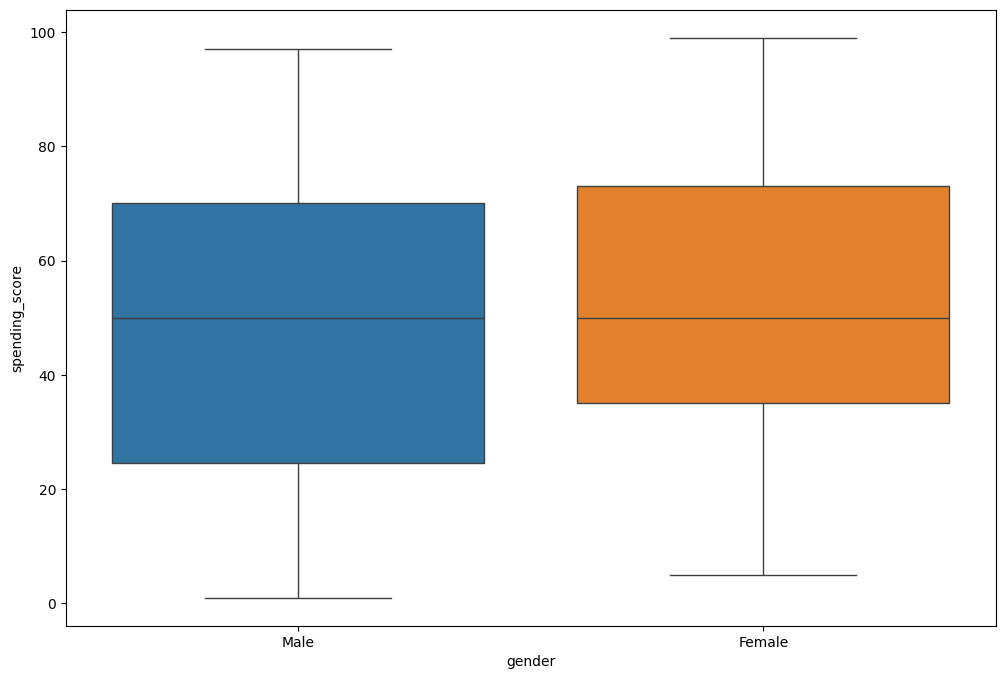

In [26]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='spending_score', hue='gender', data=mall_data, orient='v')

<Axes: xlabel='above_average_income', ylabel='spending_score'>

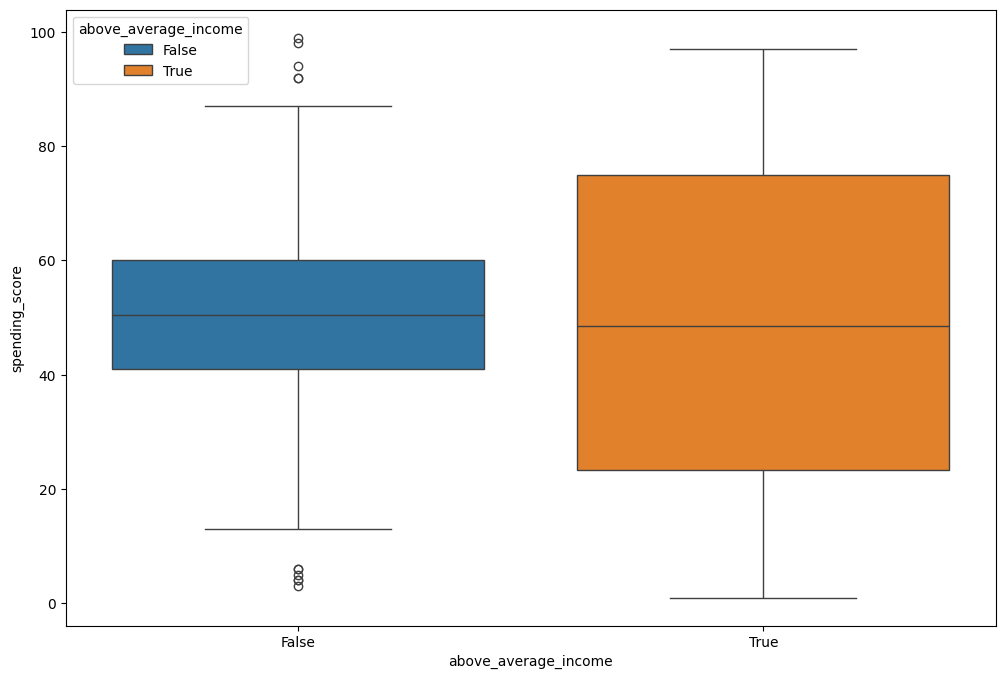

In [27]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='above_average_income', y='spending_score', hue='above_average_income', 
            data=mall_data, orient='v')

In [28]:
income_descr.var

np.float64(686386400.0)

In [29]:
age_descr.var

np.float64(194.1575)

### Calculating Standard Deviation

In [30]:
income_descr.std

np.float64(26198.97707926781)

In [31]:
age_descr.std

np.float64(13.934041050606963)

#### Describe using stats

In [32]:
stats.describe(mall_data['annual_income'])

DescribeResult(nobs=np.int64(200), minmax=(np.int64(15000), np.int64(137000)), mean=np.float64(60560.0), variance=np.float64(689835577.8894472), skewness=np.float64(0.3194236842763142), kurtosis=np.float64(-0.1258928297475106))

In [33]:
stats.describe(mall_data['age'])

DescribeResult(nobs=np.int64(200), minmax=(np.int64(18), np.int64(70)), mean=np.float64(38.85), variance=np.float64(195.1331658291457), skewness=np.float64(0.48191947090957177), kurtosis=np.float64(-0.6847513947723236))

In [37]:
listOfSeries = [pd.Series(['Male', 20, 250000, 98, True], index=mall_data.columns ), 
                pd.Series(['Female', 18, 280000, 20, True], index=mall_data.columns ),
                pd.Series(['Male', 78, 20000, 22, True], index=mall_data.columns )
               ]
series_df=pd.DataFrame(listOfSeries)
series_df

,gender,age,annual_income,spending_score,above_average_income
0,Male,20,250000,98,True
1,Female,18,280000,20,True
2,Male,78,20000,22,True


In [39]:
#mall_updated = mall_data.append(listOfSeries , ignore_index=True)
mall_updated = pd.concat([mall_data ,series_df], ignore_index=True)
mall_updated.tail()

,gender,age,annual_income,spending_score,above_average_income
198,Male,32,137000,18,True
199,Male,30,137000,83,True
200,Male,20,250000,98,True
201,Female,18,280000,20,True
202,Male,78,20000,22,True


In [40]:
np.ptp(mall_data['annual_income'])

np.int64(122000)

In [41]:
np.ptp(mall_updated['annual_income'])

np.int64(265000)

In [42]:
stats.iqr(mall_data['annual_income'], interpolation='midpoint')

np.float64(37000.0)

In [43]:
stats.iqr(mall_updated['annual_income'], interpolation='midpoint')

np.float64(37000.0)

<Axes: ylabel='spending_score'>

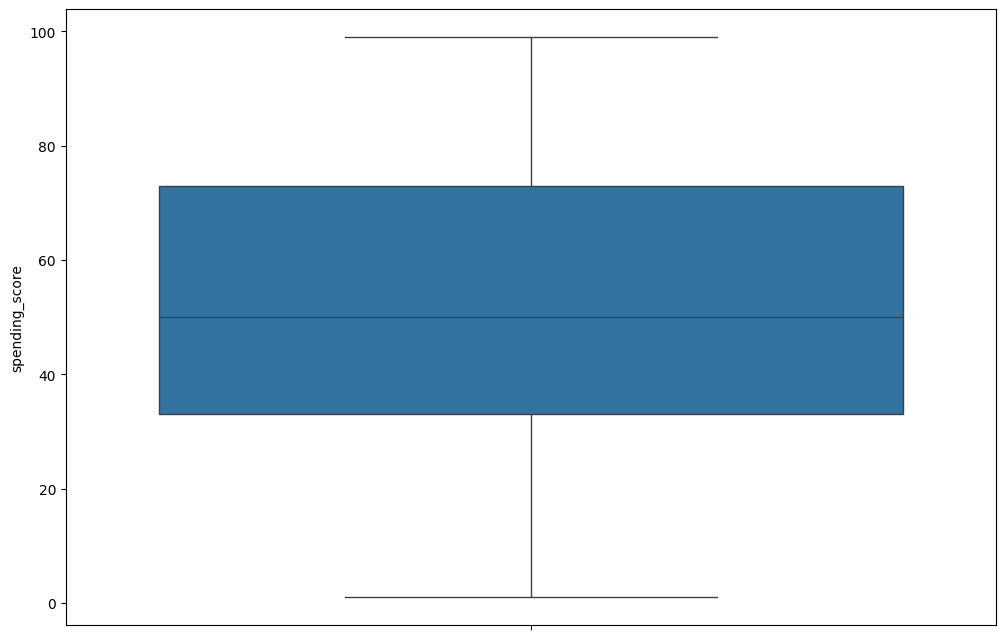

In [44]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_updated['spending_score'], orient='v')

<Axes: ylabel='annual_income'>

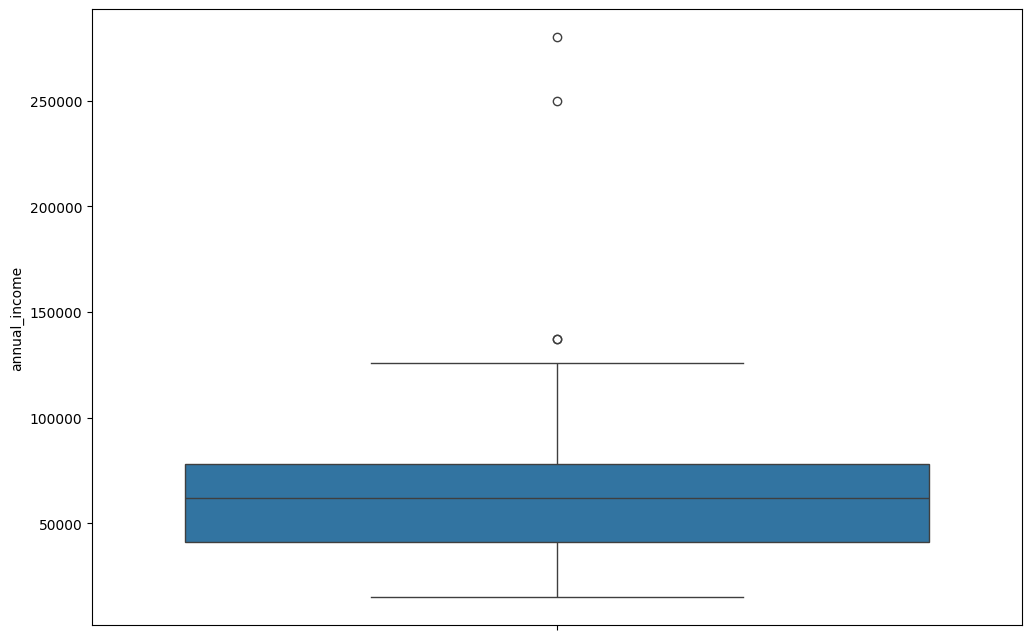

In [45]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_updated['annual_income'], orient='v')